> # Gradient Boosting Regressor

>The dataframe used in this notebook originates from the preprocessing steps 
>performed in the `"preprocessing_for_prediction_models"` notebook.
>The final refinement of selected variables is conducted here to meet the 
>specific requirements of the model being developed, based on insights from 
>the aforementioned notebook.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mstats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("gradient_boosting_regressor.csv", index_col = 0, sep = ",")

In [3]:
df.head()

,mass_vehicle,engine_capacity,engine_power,erwltp,year,electric_range,fuel_consumption,specific_co2_emissions,electric_energy_consumption,fuel_type_diesel/electric,...,fuel_type_petrol/electric,has_innovation,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
ID,,,,,,,,,,,,,,,,,,,,,
56003309,1710.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56003313,1710.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56003314,1710.0,2487.0,131.0,0.0,2021,0.0,5.7,128.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56003351,1635.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56003352,1635.0,1987.0,129.0,0.0,2021,0.0,7.1,160.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Splitting data into target and data sets, all features are categorical

target = df["electric_energy_consumption"]
data = df.drop(["electric_energy_consumption"], axis = 1)

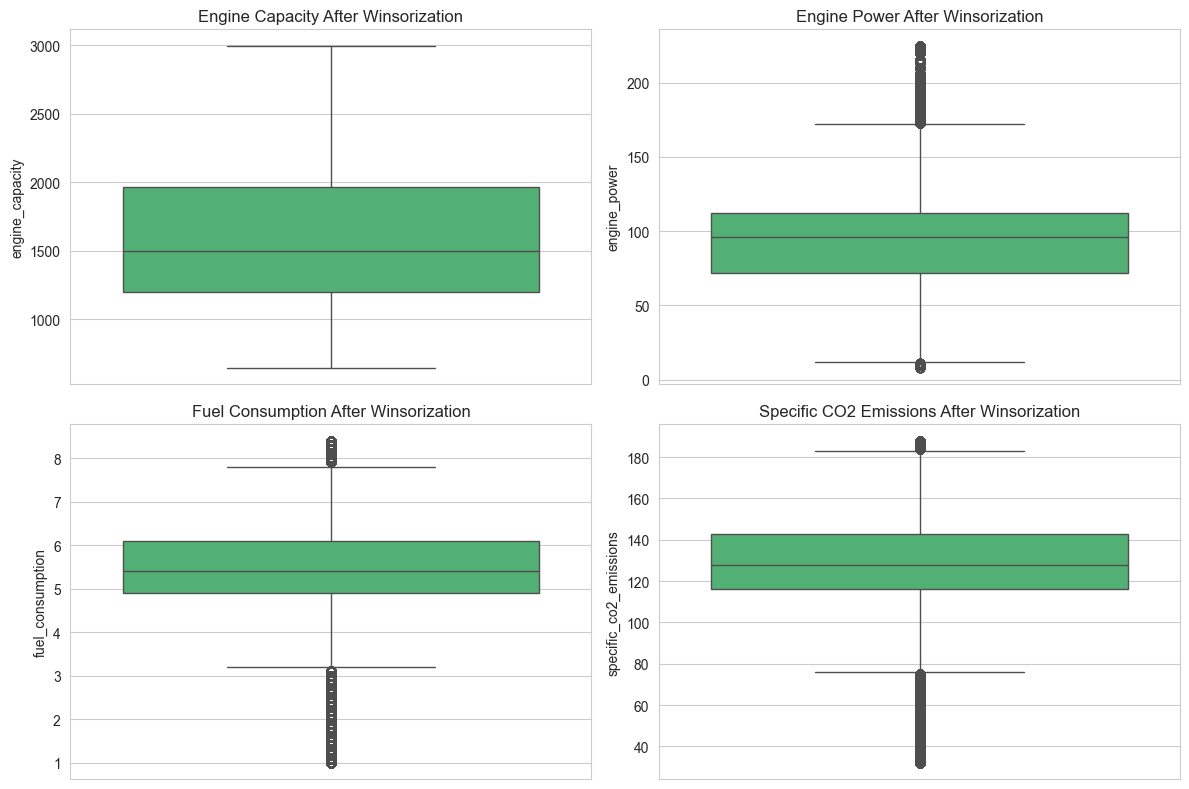

In [5]:
# Apply Winsorization to handle outliers in selected variables

data["engine_capacity"] = mstats.winsorize(data["engine_capacity"], limits = [0, 0.01])
data["engine_power"] = mstats.winsorize(data["engine_power"], limits = [0, 0.03])
data["fuel_consumption"] = mstats.winsorize(data["fuel_consumption"], limits = [0.01, 0.03])
data["specific_co2_emissions"] = mstats.winsorize(data["specific_co2_emissions"], limits = [0.05, 0.05])

# Visualize the results
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

sns.boxplot(data["engine_capacity"], color = plt.cm.viridis(0.7), ax = axes[0, 0])
axes[0, 0].set_title("Engine Capacity After Winsorization")

sns.boxplot(data["engine_power"], color = plt.cm.viridis(0.7), ax = axes[0, 1])
axes[0, 1].set_title("Engine Power After Winsorization")

sns.boxplot(data["fuel_consumption"], color = plt.cm.viridis(0.7), ax = axes[1, 0])
axes[1, 0].set_title("Fuel Consumption After Winsorization")

sns.boxplot(data["specific_co2_emissions"], color = plt.cm.viridis(0.7), ax = axes[1, 1])
axes[1, 1].set_title("Specific CO2 Emissions After Winsorization")

plt.tight_layout()
plt.show()

# Apply Winsorization to handle outliers in key variables
# The following variables are Winsorized to reduce the impact of extreme values:
# - engine_capacity (1% upper limit)
# - engine_power (2% upper limit)
# - fuel_consumption (3% upper limit)
# - specific_co2_emissions (5% upper limit)

# Note: electric_range and electric_energy_consumption are not Winsorized because their
# high values might reflect real differences in electric vehicle performance rather than
# measurement errors or anomalies.

In [6]:
# Apply logarithmic transformation to electric_range
data["electric_range"] = np.log1p(data["electric_range"])

In [7]:
# Split x into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [8]:
# Define hyperparameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5, 10]
}

In [9]:
from sklearn.model_selection import HalvingGridSearchCV

# Definir o modelo
gbr = GradientBoostingRegressor()

# Definir os hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

# Criar o Halving GridSearchCV
grid_search = HalvingGridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    factor=2,  # Redução do número de candidatos a cada iteração
    cv=5,
    scoring='r2',
    n_jobs=-1,  # Usa todos os núcleos disponíveis
    verbose=1
)

# Treinar o modelo
grid_search.fit(x_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Best parameters found:", grid_search.best_params_)


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1184134
max_resources_: 18946155
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 27
n_resources: 1184134
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 14
n_resources: 2368268
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 7
n_resources: 4736536
Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: 

In [17]:
try:
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros encontrados:", best_params)
except AttributeError:
    print("Nenhum hiperparâmetro foi salvo.")


Nenhum hiperparâmetro foi salvo.


In [ ]:
# Best model
gbest = grid_search.best_estimator_

In [ ]:
# Predictions
def predict_in_chunks(model, data, chunk_size=5000):
    predictions = []
    for i in range(0, len(data), chunk_size):
        chunk_pred = model.predict(data[i:i+chunk_size])
        predictions.extend(chunk_pred)
    return np.array(predictions)

y_pred_train = predict_in_chunks(gbest, x_train)
y_pred_test = predict_in_chunks(gbest, x_test)

In [ ]:
# Model evaluation
def evaluate_model(y_true, y_pred, dataset_type = "Test"):
    print(f"{dataset_type} Set Evaluation:")
    print(f"R2 Score: {r2_score(y_true, y_pred): .4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred): .4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred): .4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)): .4f}\n")

evaluate_model(y_train, y_pred_train, "Train")
evaluate_model(y_test, y_pred_test, "Test")

In [ ]:

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=gbest.feature_importances_, y=data.columns)
plt.title("Feature Importances")
plt.show()

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()
